In [94]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/yelp-review-dataset/yelp.csv


In [95]:
yelp = pd.read_csv("../input/yelp-review-dataset/yelp.csv")
yelp.head(2)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0


In [96]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [97]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [98]:
yelp['text length'] = yelp['text'].apply(len)

In [99]:
yelp.head(2)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345


# EDA

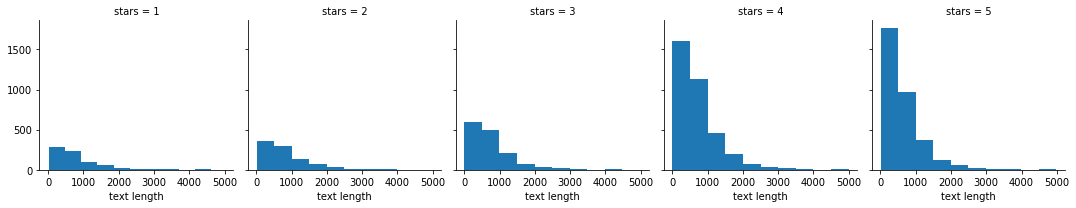

In [100]:
g = sb.FacetGrid(yelp,col='stars')
g.map(plt.hist,'text length')

<AxesSubplot:xlabel='stars', ylabel='text length'>

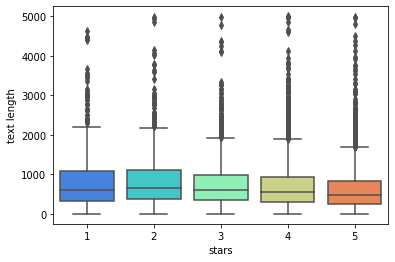

In [101]:
sb.boxplot(data=yelp,x='stars',y='text length', palette='rainbow')


<AxesSubplot:xlabel='stars', ylabel='count'>

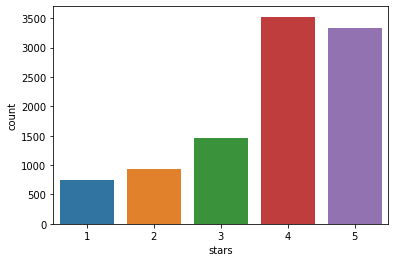

In [102]:
sb.countplot(data=yelp,x='stars')

In [103]:
stars = yelp.groupby('stars').mean()


In [104]:
stars.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


<AxesSubplot:>

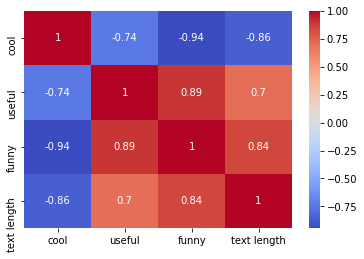

In [105]:
sb.heatmap(data=stars.corr(),cmap='coolwarm',annot=True)

# NLP classification


In [106]:
yelp_class = yelp[(yelp.stars==1) | (yelp.stars==5)]

In [107]:
x=yelp_class['text']
y=yelp_class['stars']

In [108]:
from sklearn.feature_extraction.text import CountVectorizer as CV
cv = CV()

In [109]:
x=cv.fit_transform(x)

In [110]:
from sklearn.model_selection import train_test_split as tts

In [111]:
xtrain , xtest , ytrain, ytest = tts(x,y,test_size=0.3,random_state=101)

In [112]:
from sklearn.naive_bayes import MultinomialNB as MNB
nb = MNB()

In [113]:
nb.fit(xtrain,ytrain)

MultinomialNB()

In [114]:
preds= nb.predict(xtest)

In [115]:
from sklearn.metrics import confusion_matrix as cMat, classification_report as cFReport 

In [116]:
print(cMat(ytest,preds))
print(cFReport(ytest,preds))


[[159  69]
 [ 22 976]]
              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



# Text Processing

In [124]:
from sklearn.feature_extraction.text import TfidfTransformer as TFID
from sklearn.pipeline  import Pipeline

In [126]:
pipeline = Pipeline([
    ('bow', CV()),  # strings to token integer counts
    ('tfidf', TFID()),  # integer counts to weighted TF-IDF scores
    ('classifier', MNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [130]:
X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = tts(X, y,test_size=0.3,random_state=101)

In [132]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [134]:
pres = pipeline.predict(X_test)

In [135]:
print(cMat(y_test,pres))
print(cFReport(y_test,pres))


[[  0 228]
 [  0 998]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
